In [69]:
import os
import pickle
import numpy as np
import pandas as pd
import numpy.linalg as npla
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

# classifiers / models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.svm import SVC

# data
from pylab import figure, axes, pie, title, show
from pandas.tools.plotting import table

# other
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
%matplotlib inline

In [64]:
# IMPORT THE DATA AND WRANGLE
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data')
data.to_csv("../data/agaricus-lepiota.csv")

data = pd.read_csv('../data/agaricus-lepiota.csv', delimiter=',')
data = data.drop(['Unnamed: 0'], axis=1)

# Drop any rows with na's
data.dropna()   

data = data.apply(LabelEncoder().fit_transform)

print(data.head())

X_train, X_valid, y_train, y_valid = train_test_split(data.iloc[:, 1:23], #Sets the predictors
                                                      data.iloc[:, 0], #Sets the response (poison/not poison)
                                                      test_size=0.25,
                                                      random_state=12345)

   p  x  s  n  t  p.1  f  c  n.1  k ...  s.2  w  w.1  p.2  w.2  o  p.3  k.1  \
0  0  5  2  9  1    0  1  0    0  4 ...    2  7    7    0    2  1    4    3   
1  0  0  2  8  1    3  1  0    0  5 ...    2  7    7    0    2  1    4    3   
2  1  5  3  8  1    6  1  0    1  5 ...    2  7    7    0    2  1    4    2   
3  0  5  2  3  0    5  1  1    0  4 ...    2  7    7    0    2  1    0    3   
4  0  5  3  9  1    0  1  0    0  5 ...    2  7    7    0    2  1    4    2   

   s.3  u  
0    2  1  
1    2  3  
2    3  5  
3    0  1  
4    2  1  

[5 rows x 23 columns]


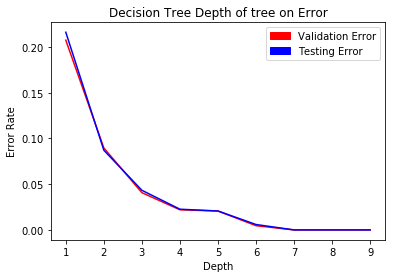

   depth  train error  validation error
0      1     0.207485          0.216150
1      2     0.089626          0.087149
2      3     0.040709          0.043328
3      4     0.021996          0.022649
4      5     0.020683          0.020679
5      6     0.004596          0.005908
6      7     0.000000          0.000000
7      8     0.000000          0.000000
8      9     0.000000          0.000000


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:52: FutureWarning: 'pandas.tools.plotting.table' is deprecated, import 'pandas.plotting.table' instead.



min validation error:
 depth               7.0
train error         0.0
validation error    0.0
Name: 6, dtype: float64

min train error:
 depth               7.0
train error         0.0
validation error    0.0
Name: 6, dtype: float64


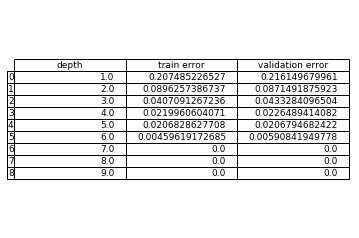

In [83]:
# Model Selection
# Decision Tree
# See what is the optimal Depth of the tree.
# I will do a decision tree/random forest before and after feature selection to see how the results change.
# Decision trees tend to overfit on data with a large number of features.
# There are several feature selection tools, most popular being PCA and RFE (Recursive Feature Elimination)

#1 Random Forest and Decision Trees
dt_train_err_list = []
dt_test_err_list = []
rand_train_err_list = []
rand_test_err_list = []
depth_list = []

for n in range(1,10,1):
    dt = DecisionTreeClassifier(max_depth = n)
    dt.fit(X_train, y_train)
    train_err = 1 - dt.score(X_train, y_train)
    test_err = 1 - dt.score(X_valid, y_valid)
    dt_train_err_list.append(train_err)
    dt_test_err_list.append(test_err) 
    depth_list.append(n)
   
############################################## 

# Make the plot for decision tree    
plt.title('Decision Tree Depth of tree on Error')

plt.xlabel('Depth')
plt.ylabel('Error Rate')

plt.plot(depth_list, dt_train_err_list, c='red')
plt.plot(depth_list, dt_test_err_list, c='blue')

red_patch = mpatches.Patch(color='red', label='Validation Error')
blue_patch = mpatches.Patch(color='blue', label='Testing Error')

plt.legend(handles=[red_patch, blue_patch])

plt.savefig('../results/DecisionTree.png')
plt.show()


dt_columns = {'depth': depth_list, 'validation error': dt_test_err_list, 'train error':dt_train_err_list}
dt_df_err = pd.DataFrame(dt_columns)
print (dt_df_err)

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, dt_df_err, loc='center')  # where df is your data frame

plt.savefig('../results/DecisionTreeTable.png')

print ("\nmin validation error:\n", dt_df_err.loc[np.argmin(dt_df_err['validation error'])])
print ("\nmin train error:\n", dt_df_err.loc[np.argmin(dt_df_err['train error'])])

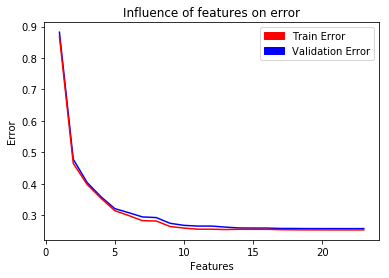

    features  train error  validation error
0          1     0.881806          0.869237
1          2     0.478495          0.465252
2          3     0.404468          0.398453
3          4     0.359336          0.354663
4          5     0.321498          0.314971
5          6     0.308645          0.299618
6          7     0.295133          0.283170
7          8     0.293006          0.282147
8          9     0.274829          0.264654
9         10     0.268334          0.259624
10        11     0.266025          0.256115
11        12     0.266024          0.256100
12        13     0.262697          0.255003
13        14     0.260050          0.255887
14        15     0.259707          0.255709
15        16     0.259708          0.255734
16        17     0.258483          0.254528
17        18     0.258367          0.254178
18        19     0.257997          0.253869
19        20     0.257954          0.253901
20        21     0.257944          0.253830
21        22     0.257944       

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:47: FutureWarning: 'pandas.tools.plotting.table' is deprecated, import 'pandas.plotting.table' instead.


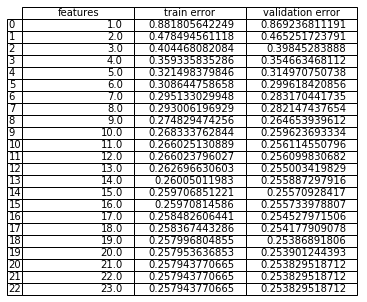

In [86]:
# RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge

train_err_list = []
val_err_list = []
features = []

for count in range(1,24):
    
    rfe = RFE(estimator = Ridge(), n_features_to_select = count) 
    features.append(count)
    
    rfe.fit(X_train, y_train)

    train_err = 1 - rfe.score(X_train, y_train)
    test_err = 1 - rfe.score(X_valid, y_valid)
    
    train_err_list.append(train_err)
    val_err_list.append(test_err)


plt.title('Influence of features on error')

plt.xlabel('Features')
plt.ylabel('Error')    
    
plt.plot(features,train_err_list, c='blue')    
plt.plot(features,val_err_list, c='red')

red_patch = mpatches.Patch(color='red', label='Train Error')
blue_patch = mpatches.Patch(color='blue', label='Validation Error')

plt.legend(handles=[red_patch, blue_patch])

plt.savefig('../results/rfe.png')
plt.show()

columns = {'features': features, 'validation error': val_err_list, 'train error':train_err_list}
df_err = pd.DataFrame(columns)
print (df_err)

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, df_err, loc='center')  # where df is your data frame

plt.savefig('../results/RFETable.png')


In [75]:
from sklearn.feature_selection import RFE

selector = RFE(estimator = Ridge(), n_features_to_select = 10)
selector = selector.fit(X_train, y_train)

# which features to keep from RFE
X_train_rfe = X_train.iloc[:,selector.support_]
X_valid_rfe = X_valid.iloc[:,selector.support_]

In [48]:
#Feature selection:
#l1/l2

#l1
# Create linear regression object
C = 1
l1 = LogisticRegression(C = C, penalty='l1')

# Train the model using the training sets
l1.fit(X_train, y_train)
l1_coef = l1.coef_
l1_selected = l1_coef>1e-6
l1_n_selected = sum(sum(l1_selected))

l1_score = l1.score(X_valid, y_valid)

print("L1 Features Selected:",l1_n_selected)
print("L1 Score:",l1_score)
print("L1 Test Error Rate:",1-l1_score)

# Create linear regression object
l2 = LogisticRegression(C = C, penalty='l2')

# Train the model using the training sets
l2.fit(X_train, y_train)
l2_coef = l2.coef_
l2_selected = l2_coef>1e-6
l2_n_selected = sum(sum(l2_selected))

l2_score = l2.score(X_valid, y_valid)

print("L2 Features Selected:",l2_n_selected)
print("L2 Score:",l2_score)
print("L2 Test Error Rate:",1-l2_score)

# Features to keep from L1/L2
X_train_l1 = X_train.iloc[:,l1_selected[0]]
X_valid_l1 = X_valid.iloc[:,l1_selected[0]]

X_train_l2 = X_train.iloc[:,l2_selected[0]]
X_valid_l2 = X_valid.iloc[:,l2_selected[0]]

L1 Features Selected: 8
L1 Score: 0.954702117184
L1 Test Error Rate: 0.0452978828163
L2 Features Selected: 7
L2 Score: 0.944854751354
L2 Test Error Rate: 0.055145248646


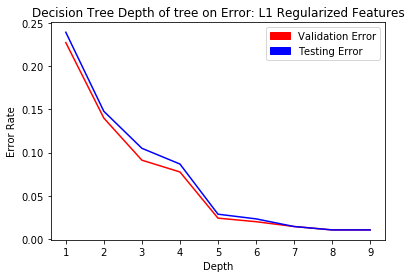

   depth  train error  validation error
0      1     0.227347          0.239291
1      2     0.139856          0.147710
2      3     0.091103          0.104874
3      4     0.077479          0.086657
4      5     0.023966          0.028557
5      6     0.019862          0.023141
6      7     0.014281          0.014279
7      8     0.010341          0.010340
8      9     0.010341          0.010340

min validation error:
 depth               8.000000
train error         0.010341
validation error    0.010340
Name: 7, dtype: float64

min train error:
 depth               8.000000
train error         0.010341
validation error    0.010340
Name: 7, dtype: float64
    features  train error  validation error
0          1     0.881806          0.869237
1          2     0.478495          0.465252
2          3     0.404468          0.398453
3          4     0.359336          0.354663
4          5     0.321498          0.314971
5          6     0.308645          0.299618
6          7     0.295133  

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:55: FutureWarning: 'pandas.tools.plotting.table' is deprecated, import 'pandas.plotting.table' instead.


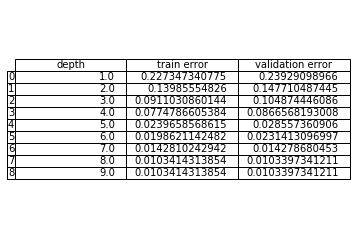

In [87]:
# DECISION TREE

# Using L1 Features

#1 Random Forest and Decision Trees
dt_train_err_list = []
dt_test_err_list = []
rand_train_err_list = []
rand_test_err_list = []
depth_list = []

for n in range(1,10,1):
    dt = DecisionTreeClassifier(max_depth = n)
    dt.fit(X_train_l1, y_train)
    train_err = 1 - dt.score(X_train_l1, y_train)
    test_err = 1 - dt.score(X_valid_l1, y_valid)
    dt_train_err_list.append(train_err)
    dt_test_err_list.append(test_err) 
    depth_list.append(n)
   
############################################## 

# Make the plot for decision tree    
plt.title('Decision Tree Depth of tree on Error: L1 Regularized Features')

plt.xlabel('Depth')
plt.ylabel('Error Rate')

plt.plot(depth_list, dt_train_err_list, c='red')
plt.plot(depth_list, dt_test_err_list, c='blue')

red_patch = mpatches.Patch(color='red', label='Validation Error')
blue_patch = mpatches.Patch(color='blue', label='Testing Error')

plt.legend(handles=[red_patch, blue_patch])

plt.savefig('../results/DecisionTreeL1.png')
plt.show()

dt_columns = {'depth': depth_list, 'validation error': dt_test_err_list, 'train error':dt_train_err_list}
dt_df_err = pd.DataFrame(dt_columns)
print (dt_df_err)

print ("\nmin validation error:\n", dt_df_err.loc[np.argmin(dt_df_err['validation error'])])
print ("\nmin train error:\n", dt_df_err.loc[np.argmin(dt_df_err['train error'])])

columns = {'features': features, 'validation error': val_err_list, 'train error':train_err_list}
df_err = pd.DataFrame(columns)
print (df_err)

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, dt_df_err, loc='center')  # where df is your data frame

plt.savefig('../results/DecisionTreeL1Table.png')

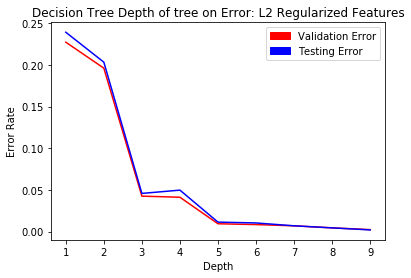

   depth  train error  validation error
0      1     0.227347          0.239291
1      2     0.196159          0.203348
2      3     0.042515          0.045790
3      4     0.041202          0.049729
4      5     0.009357          0.011324
5      6     0.008372          0.010340
6      7     0.006894          0.006893
7      8     0.004432          0.004431
8      9     0.002298          0.001969

min validation error:
 depth               9.000000
train error         0.002298
validation error    0.001969
Name: 8, dtype: float64

min train error:
 depth               9.000000
train error         0.002298
validation error    0.001969
Name: 8, dtype: float64


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:51: FutureWarning: 'pandas.tools.plotting.table' is deprecated, import 'pandas.plotting.table' instead.


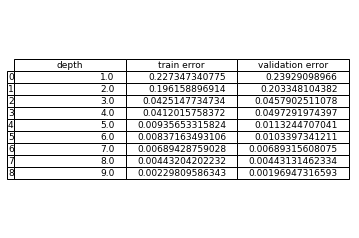

In [88]:
# DECISION TREE

# Using L2 Features

#1 Random Forest and Decision Trees
dt_train_err_list = []
dt_test_err_list = []
rand_train_err_list = []
rand_test_err_list = []
depth_list = []

for n in range(1,10,1):
    dt = DecisionTreeClassifier(max_depth = n)
    dt.fit(X_train_l2, y_train)
    train_err = 1 - dt.score(X_train_l2, y_train)
    test_err = 1 - dt.score(X_valid_l2, y_valid)
    dt_train_err_list.append(train_err)
    dt_test_err_list.append(test_err) 
    depth_list.append(n)
   
############################################## 

# Make the plot for decision tree    
plt.title('Decision Tree Depth of tree on Error: L2 Regularized Features')

plt.xlabel('Depth')
plt.ylabel('Error Rate')

plt.plot(depth_list, dt_train_err_list, c='red')
plt.plot(depth_list, dt_test_err_list, c='blue')

red_patch = mpatches.Patch(color='red', label='Validation Error')
blue_patch = mpatches.Patch(color='blue', label='Testing Error')

plt.legend(handles=[red_patch, blue_patch])

plt.savefig('../results/DecisionTreeL2.png')
plt.show()

dt_columns = {'depth': depth_list, 'validation error': dt_test_err_list, 'train error':dt_train_err_list}
dt_df_err = pd.DataFrame(dt_columns)
print (dt_df_err)

print ("\nmin validation error:\n", dt_df_err.loc[np.argmin(dt_df_err['validation error'])])
print ("\nmin train error:\n", dt_df_err.loc[np.argmin(dt_df_err['train error'])])

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, dt_df_err, loc='center')  # where df is your data frame

plt.savefig('../results/DecisionTreeL2Table.png')

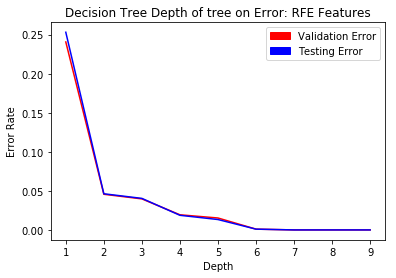

   depth  train error  validation error
0      1     0.240643          0.253077
1      2     0.045634          0.046283
2      3     0.039724          0.040374
3      4     0.019370          0.018710
4      5     0.015266          0.013294
5      6     0.000985          0.000985
6      7     0.000000          0.000000
7      8     0.000000          0.000000
8      9     0.000000          0.000000

min validation error:
 depth               7.0
train error         0.0
validation error    0.0
Name: 6, dtype: float64

min train error:
 depth               7.0
train error         0.0
validation error    0.0
Name: 6, dtype: float64


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:51: FutureWarning: 'pandas.tools.plotting.table' is deprecated, import 'pandas.plotting.table' instead.


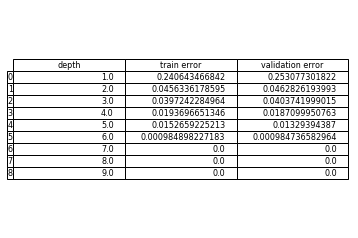

In [89]:
# DECISION TREE

# Using RFE Features

#1 Random Forest and Decision Trees
dt_train_err_list = []
dt_test_err_list = []
rand_train_err_list = []
rand_test_err_list = []
depth_list = []

for n in range(1,10,1):
    dt = DecisionTreeClassifier(max_depth = n)
    dt.fit(X_train_rfe, y_train)
    train_err = 1 - dt.score(X_train_rfe, y_train)
    test_err = 1 - dt.score(X_valid_rfe, y_valid)
    dt_train_err_list.append(train_err)
    dt_test_err_list.append(test_err) 
    depth_list.append(n)
   
############################################## 

# Make the plot for decision tree    
plt.title('Decision Tree Depth of tree on Error: RFE Features')

plt.xlabel('Depth')
plt.ylabel('Error Rate')

plt.plot(depth_list, dt_train_err_list, c='red')
plt.plot(depth_list, dt_test_err_list, c='blue')

red_patch = mpatches.Patch(color='red', label='Validation Error')
blue_patch = mpatches.Patch(color='blue', label='Testing Error')

plt.legend(handles=[red_patch, blue_patch])

plt.savefig('../results/DecisionTreeRFE.png')
plt.show()

dt_columns = {'depth': depth_list, 'validation error': dt_test_err_list, 'train error':dt_train_err_list}
dt_df_err = pd.DataFrame(dt_columns)
print (dt_df_err)

print ("\nmin validation error:\n", dt_df_err.loc[np.argmin(dt_df_err['validation error'])])
print ("\nmin train error:\n", dt_df_err.loc[np.argmin(dt_df_err['train error'])])

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, dt_df_err, loc='center')  # where df is your data frame

plt.savefig('../results/DecisionTreeRFETable.png')

In [54]:
# Model Selection
lm = LinearRegression()
lm.fit(X_train,y_train)

mean_squared_err = lambda y, yhat: np.mean((y-yhat)**2)

print("Training error:", mean_squared_err(y_train, lm.predict(X_train)))
print("Validation error:", mean_squared_err(y_valid, lm.predict(X_valid)))

Training error: 0.06440821566000332
Validation error: 0.06332917165468699


In [55]:
# Find best ridge parameters
alpha = 10.0**np.arange(-4,6)
parameters = {'alpha':alpha}
rd = Ridge()
grid_rd = GridSearchCV(rd, parameters)
grid_rd.fit(X_train, y_train)

print("Best Alpha parameters:")
print(grid_rd.best_params_)
print("Best training score:")
print(grid_rd.best_score_)

Best Alpha parameters:
{'alpha': 1.0}
Best training score:
0.73762273586


In [57]:
# Ridge training and validation error
rd = Ridge(alpha=1)
rd.fit(X_train,y_train)
print("Training error:", mean_squared_err(y_train, rd.predict(X_train)))
print("Validation error:", mean_squared_err(y_valid, rd.predict(X_valid)))

Training error: 0.06440931530804177
Validation error: 0.06335140100609721


In [61]:
# Ridge training and validation error
rd = Ridge(alpha=1)
rd.fit(X_train_rfe,y_train)
print("Training error:", mean_squared_err(y_train, rd.predict(X_train_rfe)))
print("Validation error:", mean_squared_err(y_valid, rd.predict(X_valid_rfe)))

Training error: 0.06700372679770147
Validation error: 0.06479752548290792
